In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0


In [3]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])


In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [5]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10


1875/1875 [==============================] - 12s 3ms/step - loss: 0.2929 - accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1415 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1074 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0750 - accuracy: 0.9761
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0637 - accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0552 - accuracy: 0.9826
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0527 - accuracy: 0.9829
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0480 - accuracy: 0.9843
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 1s - loss: 0.0691 - accuracy: 0.9804 - 1s/epoch - 3ms/step
Test accuracy: 0.980400025844574


In [7]:
probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


313/313 [==============================] - 1s 2ms/step


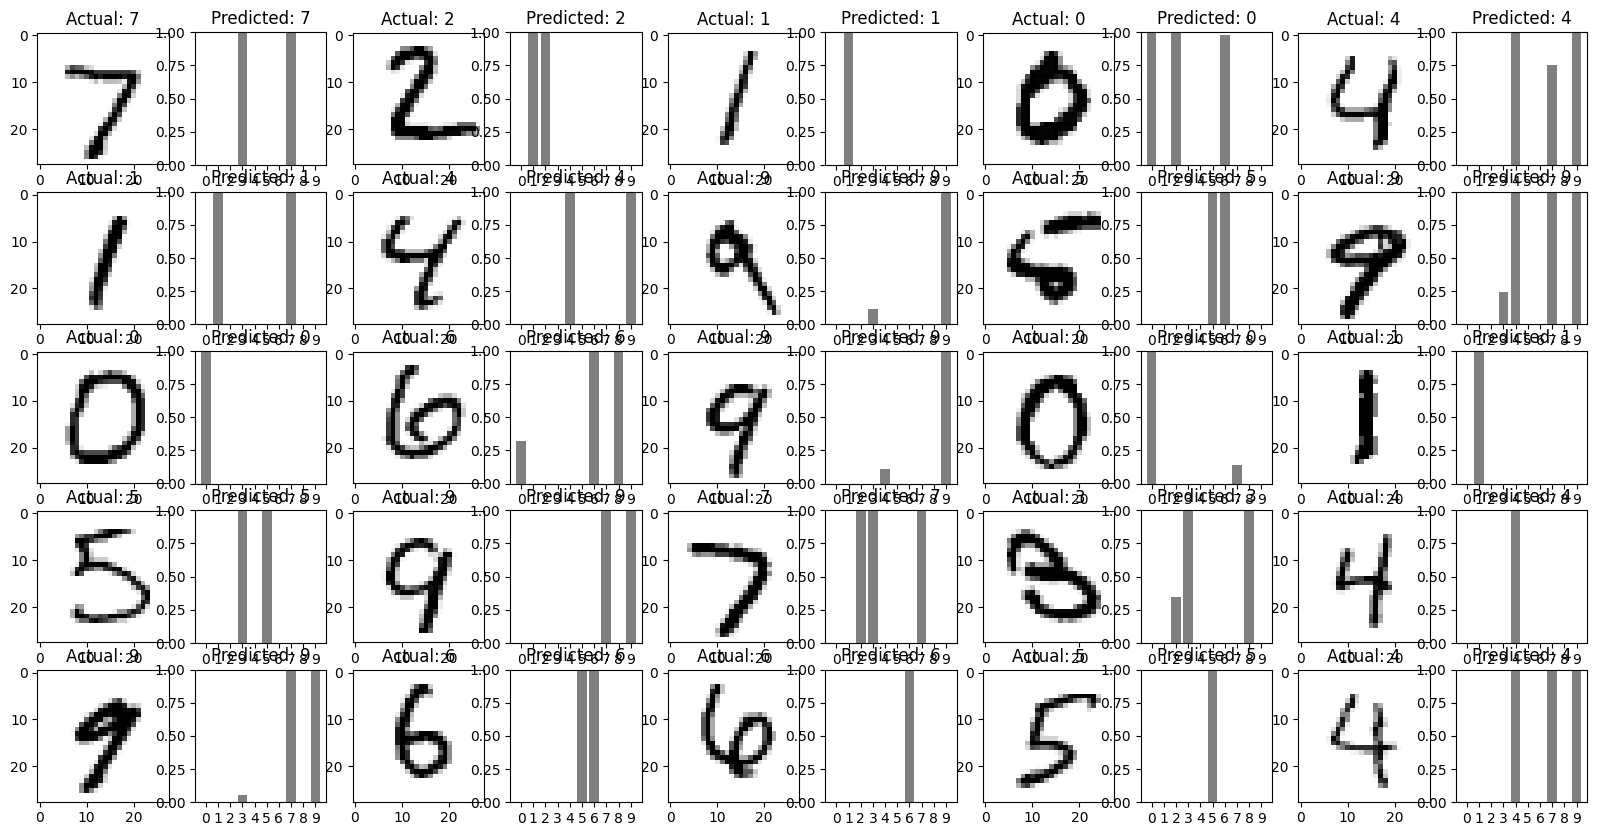

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Get model predictions on the test set
test_predictions = model.predict(test_images)

# Display a few test images along with their predictions
num_rows, num_cols = 5, 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f'Actual: {test_labels[i]}')
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), test_predictions[i], color='gray')
    plt.xticks(range(10))
    plt.ylim([0, 1])
    predicted_label = np.argmax(test_predictions[i])
    plt.title(f'Predicted: {predicted_label}')
plt.show()


In [10]:
from PIL import Image
import numpy as np

# Specify the path to your image file
image_path = 'bsbjn.png'  # Replace with the actual path to your image file

# Load the image using PIL
img = Image.open(image_path)

# Convert the image to grayscale
img_gray = img.convert('L')

# Resize the image to 28x28 pixels
img_resized = img_gray.resize((28, 28))

# Convert the resized image to a NumPy array
img_array = np.array(img_resized)

# Check the shape of the array
print("Original Image Shape:", img_array.shape)

# Normalize pixel values
new_image = img_array / 255.0

# Reshape the image to match the input shape of the model
new_image = new_image.reshape(1, 28, 28, 1)  # Add an additional dimension for the channel

print("Reshaped Image Shape:", new_image.shape)


Original Image Shape: (28, 28)
Reshaped Image Shape: (1, 28, 28, 1)


In [ ]:
# Use the model to make predictions
predictions = model.predict(new_image)

# The model output is logits; apply softmax to get probabilities
probability_model = tf.keras.Sequential([model, layers.Softmax()])
predicted_probabilities = probability_model.predict(new_image)

# Get the predicted digit (class with the highest probability)
predicted_digit = tf.argmax(predicted_probabilities[0]).numpy()


1/1 [==============================] - 0s 78ms/step


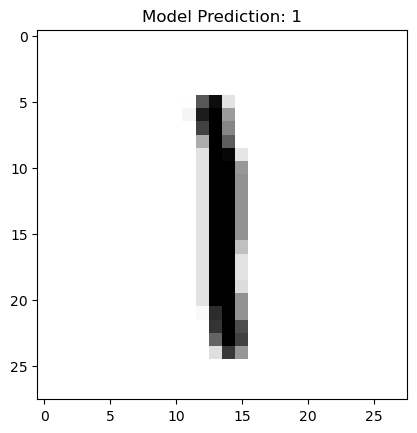

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the original image loaded in 'new_image'
plt.imshow(new_image[0], cmap=plt.cm.binary)
plt.title(f'Model Prediction: {predicted_digit}')
plt.show()


In [ ]:
# Save the entire model to a Keras format file
model.save('my_model.keras')
